In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.cluster import KMeans

In [4]:
data_stops = pd.read_csv('../data/uni_molde_v3.csv', sep=';', low_memory=False)

sorted_data_stops = data_stops.sort_values(by='stop_dispatched_at', ascending=True)
sorted_data_stops = sorted_data_stops.reset_index(drop=True)
sorted_data_stops.head()

stop_completed_at                stop_arrived_at  \
0  2024-01-02 11:10:52.185782+00  2024-01-02 11:10:51.209288+00   
1  2024-01-02 11:10:52.185783+00  2024-01-02 11:10:51.209289+00   
2  2024-01-02 11:10:52.178147+00   2024-01-02 11:10:51.03874+00   
3  2024-01-02 11:10:52.178148+00  2024-01-02 11:10:51.038741+00   
4  2024-01-02 08:39:35.128145+00  2024-01-02 07:45:25.310456+00   

              stop_latest           stop_earliest  \
0  2024-01-02 22:59:00+00  2024-01-02 05:00:00+00   
1  2024-01-02 22:59:00+00  2024-01-02 05:00:00+00   
2  2024-01-02 21:00:00+00  2024-01-02 05:00:00+00   
3  2024-01-02 21:00:00+00  2024-01-02 05:00:00+00   
4  2024-01-02 21:00:00+00  2024-01-02 05:00:00+00   

              stop_dispatched_at  location_id  location_type_id  \
0  2023-12-20 09:20:12.139397+00       104448                 1   
1  2023-12-20 09:20:12.144071+00        86931                 2   
2  2023-12-20 09:21:01.657773+00        86931                 1   
3  2023-12-20 09:21:01.661233+00       148025                 2   
4  2023-12-20 09:22:29.569837+00        86931                 1   

   driver_workday_id  address_id  location_is_depot  driver_id  current_lat  \
0             299448       80079              False       1081    56.455617   
1             299448       81843              False       1081    59.473000   
2             299447       81843              False        657    59.473000   
3             299447      134404              False        657    58.783764   
4             299444       81843              False        428    59.473000   

   current_lng  prev_planned_lat  prev_planned_lng  prev_actual_lat  \
0    10.051820               NaN               NaN              NaN   
1    10.318318         56.455617         10.051820        56.455617   
2    10.318318               NaN               NaN              NaN   
3     5.734901         59.473000         10.318318        59.473000   
4    10.318318               NaN               NaN              NaN   

   prev_actual_lng  
0              NaN  
1        10.051820  
2              NaN  
3        10.318318  
4              NaN

In [8]:
import geopandas as gpd

gdf_rs = gpd.GeoDataFrame(
    sorted_data_stops,
    geometry=gpd.points_from_xy(
        x = sorted_data_stops['current_lat'],
        y = sorted_data_stops['current_lng']
    )
)
gdf_rs.head()

stop_completed_at                stop_arrived_at  \
0  2024-01-02 11:10:52.185782+00  2024-01-02 11:10:51.209288+00   
1  2024-01-02 11:10:52.185783+00  2024-01-02 11:10:51.209289+00   
2  2024-01-02 11:10:52.178147+00   2024-01-02 11:10:51.03874+00   
3  2024-01-02 11:10:52.178148+00  2024-01-02 11:10:51.038741+00   
4  2024-01-02 08:39:35.128145+00  2024-01-02 07:45:25.310456+00   

              stop_latest           stop_earliest  \
0  2024-01-02 22:59:00+00  2024-01-02 05:00:00+00   
1  2024-01-02 22:59:00+00  2024-01-02 05:00:00+00   
2  2024-01-02 21:00:00+00  2024-01-02 05:00:00+00   
3  2024-01-02 21:00:00+00  2024-01-02 05:00:00+00   
4  2024-01-02 21:00:00+00  2024-01-02 05:00:00+00   

              stop_dispatched_at  location_id  location_type_id  \
0  2023-12-20 09:20:12.139397+00       104448                 1   
1  2023-12-20 09:20:12.144071+00        86931                 2   
2  2023-12-20 09:21:01.657773+00        86931                 1   
3  2023-12-20 09:21:01.661233+00       148025                 2   
4  2023-12-20 09:22:29.569837+00        86931                 1   

   driver_workday_id  address_id  location_is_depot  driver_id  current_lat  \
0             299448       80079              False       1081    56.455617   
1             299448       81843              False       1081    59.473000   
2             299447       81843              False        657    59.473000   
3             299447      134404              False        657    58.783764   
4             299444       81843              False        428    59.473000   

   current_lng  prev_planned_lat  prev_planned_lng  prev_actual_lat  \
0    10.051820               NaN               NaN              NaN   
1    10.318318         56.455617         10.051820        56.455617   
2    10.318318               NaN               NaN              NaN   
3     5.734901         59.473000         10.318318        59.473000   
4    10.318318               NaN               NaN              NaN   

   prev_actual_lng                   geometry  
0              NaN  POINT (56.45562 10.05182)  
1        10.051820    POINT (59.473 10.31832)  
2              NaN    POINT (59.473 10.31832)  
3        10.318318    POINT (58.78376 5.7349)  
4              NaN    POINT (59.473 10.31832)

<Axes: >

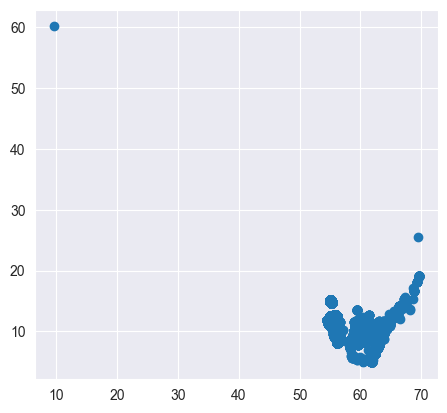

In [9]:
gdf_rs.plot()

In [25]:
gdf_rs.crs = {'init': 'epsg:5799'}
gdf_rs.crs

/Users/anko/opt/anaconda3/envs/RealDataClassificator/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Vertical CRS: EPSG:5799>
Name: DVR90 height
Axis Info [vertical]:
- H[up]: Gravity-related height (metre)
Area of Use:
- name: Denmark - onshore.
- bounds: (8.0, 54.51, 15.25, 57.8)
Datum: Dansk Vertikal Reference 1990
- Ellipsoid: undefined
- Prime Meridian: undefined

/Users/anko/opt/anaconda3/envs/RealDataClassificator/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

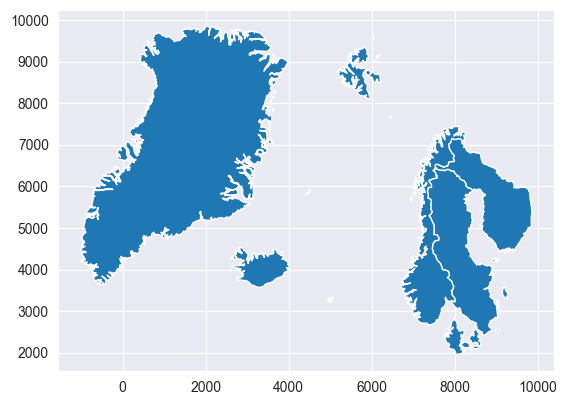

In [26]:
# Create geodataframe
gdf_map = gpd.read_file(
    'https://code.highcharts.com/mapdata/custom/nordic-countries.geo.json'
)

# Set the CRS
gdf_map.crs = {'init': 'epsg:5799'}

# Check the CRS
gdf_map.plot()



In [27]:
gdf_map.head()

id hc-group  hc-middle-x  hc-middle-y hc-key hc-a2           name  \
0  DK   admin0         0.18         0.58     dk    DK        Denmark   
1  FO   admin0         0.40         0.72     fo    FO  Faroe Islands   
2  GL   admin0         0.56         0.41     gl    GL      Greenland   
3  FI   admin0         0.74         0.60     fi    FI        Finland   
4  SE   admin0         0.46         0.66     se    SE         Sweden   

  labelrank country-abbrev         subregion              region-wb iso-a3  \
0         4           Den.   Northern Europe  Europe & Central Asia    DNK   
1         6     Faeroe Is.   Northern Europe  Europe & Central Asia    FRO   
2         3         Grlnd.  Northern America  Europe & Central Asia    GRL   
3         3           Fin.   Northern Europe  Europe & Central Asia    FIN   
4         3           Swe.   Northern Europe  Europe & Central Asia    SWE   

  iso-a2    woe-id      continent  \
0     DK  23424796         Europe   
1     FO  23424816         Europe   
2     GL  23424828  North America   
3     FI  23424812         Europe   
4     SE  23424954         Europe   

                                            geometry  
0  MULTIPOLYGON (((8458 2163, 8532 2153, 8545 218...  
1  MULTIPOLYGON (((4960 3257, 4962 3225, 4922 325...  
2  MULTIPOLYGON (((-75 6281, -196 6332, -178 6382...  
3  MULTIPOLYGON (((9297 4417, 9295 4457, 9269 445...  
4  MULTIPOLYGON (((8127 3008, 8113 2965, 8071 301...

In [28]:
# gdf_map = gdf_map['iso-a2']
gdf_map = gdf_map.to_crs(epsg='5596')

# Check the CRS
gdf_map.crs

<Projected CRS: EPSG:5596>
Name: FEH2010 / Fehmarnbelt TM
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Fehmarnbelt area of Denmark and Germany.
- bounds: (10.66, 54.33, 12.01, 54.83)
Coordinate Operation:
- name: Fehmarnbelt TM
- method: Transverse Mercator
Datum: Fehmarnbelt Datum 2010
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [21]:
def plot_map_1():
    """Plot a map and data"""

    # Base Map
    base_map = gdf_map.plot(
        color='white',
        edgecolor='grey',
        linewidth=0.5,
        figsize=(15, 8),
        legend=True
    )
    base_map.axis('off')
    base_map.set_title('Location')

    # Data
    gdf_rs.plot(ax=base_map);

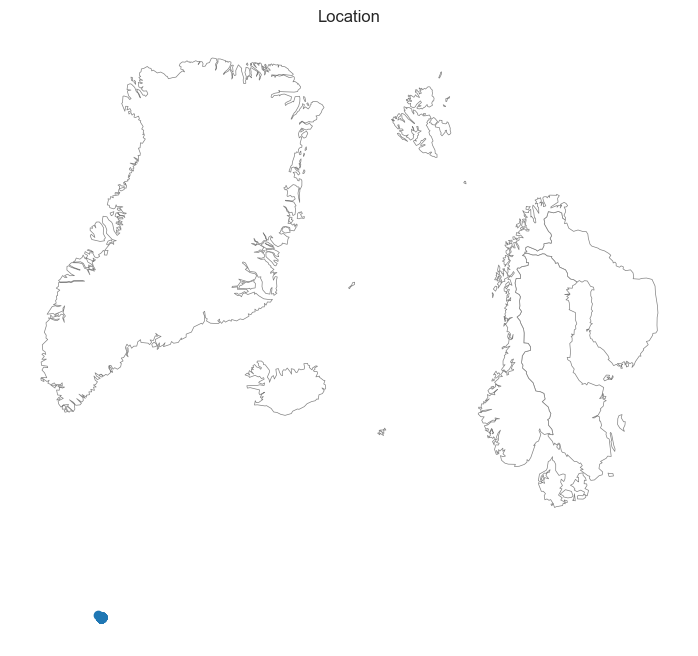

In [22]:
plot_map_1()

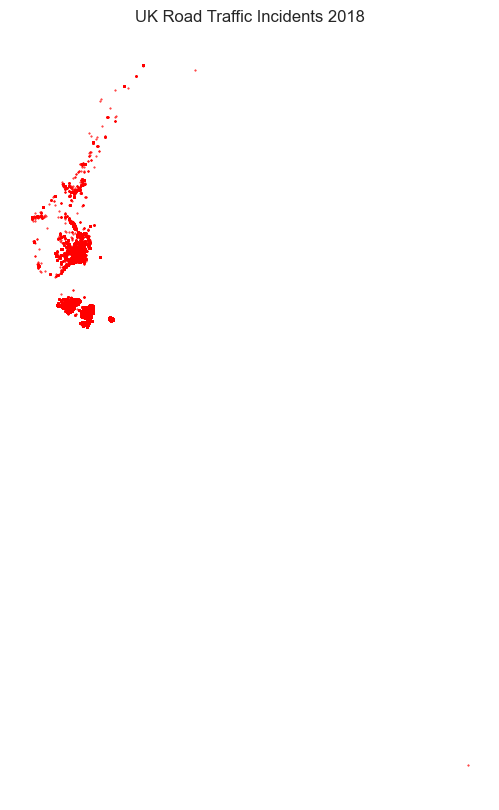

In [29]:
def plot_map_2():
    # Base Map
    base_map = gdf_map.to_crs(epsg='5596').plot(
        color='white',
        edgecolor='grey',
        linewidth=0.5,
        figsize=(10, 10),
        legend=True
    )

    base_map.axis('off')
    base_map.set_title('Locations')

    # Data
    gdf_rs.to_crs(epsg='3395').plot(
        ax=base_map,
        markersize=0.2,
        color='red'
    );

plot_map_2()

In [30]:
!pip install keplergl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 45.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached ipython_genutils-0.2.0-py2.py3-none-any.whl.metadata (755 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 20.2 MB/s eta 0:00:00
Using cached ipython_genutils-0.2.0-py2.py3-none-any.whl (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.0/238.0 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 41.8 MB/s eta 0:00:00
  Created wheel for keplergl: filename=keplergl-0.3.2-py2.py3-none-any.whl size=17922317 sha256=6daac525a688176143af1d88a4f1b0baf3dd739313e73d349cd974c97bfd16fc
  Stored in directory: /Users/anko/Library/Caches/pip/wheels/e5/e9/db/b8b8f2fcb5cb1cd7268d88959fce267bc00697cb8f50dcd0d9
Successfully built keplergl
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyter

In [35]:
gdf_depots = gdf_rs[gdf_rs['location_is_depot'] == True]

In [36]:
from keplergl import KeplerGl

kepler_map = KeplerGl(
    height=700,
    data={
        'Locations': gdf_rs,
        'Depots': gdf_depots
    }
)

kepler_map.save_to_html(file_name="Location.html")

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


/Users/anko/opt/anaconda3/envs/RealDataClassificator/lib/python3.10/site-packages/jupyter_client/session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


Map saved to Location.html!


In [33]:
gdf_rs.head()

stop_completed_at                stop_arrived_at  \
0  2024-01-02 11:10:52.185782+00  2024-01-02 11:10:51.209288+00   
1  2024-01-02 11:10:52.185783+00  2024-01-02 11:10:51.209289+00   
2  2024-01-02 11:10:52.178147+00   2024-01-02 11:10:51.03874+00   
3  2024-01-02 11:10:52.178148+00  2024-01-02 11:10:51.038741+00   
4  2024-01-02 08:39:35.128145+00  2024-01-02 07:45:25.310456+00   

              stop_latest           stop_earliest  \
0  2024-01-02 22:59:00+00  2024-01-02 05:00:00+00   
1  2024-01-02 22:59:00+00  2024-01-02 05:00:00+00   
2  2024-01-02 21:00:00+00  2024-01-02 05:00:00+00   
3  2024-01-02 21:00:00+00  2024-01-02 05:00:00+00   
4  2024-01-02 21:00:00+00  2024-01-02 05:00:00+00   

              stop_dispatched_at  location_id  location_type_id  \
0  2023-12-20 09:20:12.139397+00       104448                 1   
1  2023-12-20 09:20:12.144071+00        86931                 2   
2  2023-12-20 09:21:01.657773+00        86931                 1   
3  2023-12-20 09:21:01.661233+00       148025                 2   
4  2023-12-20 09:22:29.569837+00        86931                 1   

   driver_workday_id  address_id  location_is_depot  driver_id  current_lat  \
0             299448       80079              False       1081    56.455617   
1             299448       81843              False       1081    59.473000   
2             299447       81843              False        657    59.473000   
3             299447      134404              False        657    58.783764   
4             299444       81843              False        428    59.473000   

   current_lng  prev_planned_lat  prev_planned_lng  prev_actual_lat  \
0    10.051820               NaN               NaN              NaN   
1    10.318318         56.455617         10.051820        56.455617   
2    10.318318               NaN               NaN              NaN   
3     5.734901         59.473000         10.318318        59.473000   
4    10.318318               NaN               NaN              NaN   

   prev_actual_lng                   geometry  
0              NaN  POINT (56.45562 10.05182)  
1        10.051820    POINT (59.473 10.31832)  
2              NaN    POINT (59.473 10.31832)  
3        10.318318    POINT (58.78376 5.7349)  
4              NaN    POINT (59.473 10.31832)